In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scanpy
#!pip install scvelo
#!pip install git+https://github.com/csgroen/scycle.git#egg=scycle
#!pip install  --no-dependencies  git+https://github.com/j-bac/elpigraph-python.git
# from elpigraph_ps_tools import *
#import elpigraph
import scanpy as sc
import anndata



import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 96 kB 5.2 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 11.2 MB 33.0 MB/s 
     |████████████████████████████████| 965 kB 52.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=6cc297a2c7ea95c7e5dd3ffb4995292be28808feefc5807b8969348d8fde525c
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=c12c7c64bbcfe61f4cb8c9a8c0faa0ea4344ef27d3fa5055e7af0c9934f8b837
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
path = '/content/drive/MyDrive/msdata.h5ad'
adata = sc.read(path)


In [ ]:
adata

AnnData object with n_obs × n_vars = 48918 × 35278
    obs: 'tsne1', 'tsne2', 'cluster_original', 'sample', 'diagnosis', 'stage', 'age', 'sex', 'region', 'Capbatch', 'Seqbatch', 'RIN', 'PMI', 'genes', 'UMIs', 'mito_perc', 'ribo_perc', 'lesion_stage', 'cluster', 'cell_type', 'DMGM_UL', 'DMGM_DL', 'DMWM', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'annot_level_2', 'annot_level_3'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'annot_level_2_colors', 'annot_level_3_colors', 'cell_type_colors', 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'region_colors', 'sample_colors', 'sex_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.obs

,tsne1,tsne2,cluster_original,sample,diagnosis,stage,age,sex,region,Capbatch,...,DMGM_UL,DMGM_DL,DMWM,n_genes,percent_mito,percent_ribo,n_counts,leiden,annot_level_2,annot_level_3
AAACCTGGTCCATGAT-1_5981_BA9,19.121044,-20.540960,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3795,0.005292,0.002951,9827.0,14,Glutamatergic,L5_6
AAACGGGAGTAGCCGA-1_5981_BA9,5.136135,-13.751351,4,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,2510,0.005038,0.004457,5161.0,2,Glutamatergic,L2_3
AAACGGGCATCGGTTA-1_5981_BA9,-28.210752,-20.764837,6A,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3779,0.018633,0.007034,8104.0,10,GABAergic,PV
AAACGGGTCCATGAAC-1_5981_BA9,29.946121,-15.725056,2,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3376,0.016441,0.007046,7238.0,12,Glutamatergic,L4
AAAGATGCACGACTCG-1_5981_BA9,25.065271,-19.422704,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,4337,0.007789,0.002841,10913.0,21,Glutamatergic,L5_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTAAGA-1_MS200_A303,-5.428651,17.107557,5,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,857,0.003260,0.011410,1227.0,0,Oligodendrocyte,Oligodendrocyte
TTTGTCAGTTCGCGAC-1_MS200_A303,34.011235,-18.509118,2,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,5463,0.010610,0.018160,14703.0,9,Glutamatergic,L4
TTTGTCAGTTCTGGTA-1_MS200_A303,-16.622547,20.910561,8,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,1560,0.018838,0.003925,2548.0,1,Astrocyte,Astrocyte
TTTGTCATCCAAATGC-1_MS200_A303,-5.947137,-35.594686,16,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,814,0.051595,0.019700,1066.0,8,Glutamatergic,PYR


In [ ]:
adata.obs['diagnosis'].unique()

['Control', 'MS']
Categories (2, object): ['Control', 'MS']

In [ ]:
adata.obs['stage'].unique()

['Control', 'Acute/Chronic active', 'Chronic inactive']
Categories (3, object): ['Acute/Chronic active', 'Chronic inactive', 'Control']

In [ ]:
adata.var

,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
WASH7P,1109,False,0.047816,1.409960,0.301700,0,False
RP11-34P13.3,16,False,0.000528,0.093349,-0.515871,0,False
RP11-34P13.7,446,False,0.020031,1.262493,0.085054,0,False
CICP27,457,False,0.027244,1.394002,0.272893,1,False
RP11-34P13.15,107,False,0.005112,0.731385,-0.358465,1,False
...,...,...,...,...,...,...,...
MT-TL2,14,False,0.000952,0.386321,-0.105435,2,False
MT-ND5,18464,True,1.030431,2.070064,0.776088,7,False
MT-ND6,2530,False,0.124018,1.552415,0.494786,0,False
MT-CYB,29646,True,1.881792,2.787494,1.022050,10,False


In [ ]:
adata_h = adata[adata.obs.diagnosis == 'Control']
adata_d = adata[adata.obs.diagnosis == 'MS']

In [ ]:
adata_h

View of AnnData object with n_obs × n_vars = 17402 × 35278
    obs: 'tsne1', 'tsne2', 'cluster_original', 'sample', 'diagnosis', 'stage', 'age', 'sex', 'region', 'Capbatch', 'Seqbatch', 'RIN', 'PMI', 'genes', 'UMIs', 'mito_perc', 'ribo_perc', 'lesion_stage', 'cluster', 'cell_type', 'DMGM_UL', 'DMGM_DL', 'DMWM', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'annot_level_2', 'annot_level_3'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'annot_level_2_colors', 'annot_level_3_colors', 'cell_type_colors', 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'region_colors', 'sample_colors', 'sex_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_d

View of AnnData object with n_obs × n_vars = 31516 × 35278
    obs: 'tsne1', 'tsne2', 'cluster_original', 'sample', 'diagnosis', 'stage', 'age', 'sex', 'region', 'Capbatch', 'Seqbatch', 'RIN', 'PMI', 'genes', 'UMIs', 'mito_perc', 'ribo_perc', 'lesion_stage', 'cluster', 'cell_type', 'DMGM_UL', 'DMGM_DL', 'DMWM', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'annot_level_2', 'annot_level_3'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'annot_level_2_colors', 'annot_level_3_colors', 'cell_type_colors', 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'region_colors', 'sample_colors', 'sex_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
!pip install contrastive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for contrastive: filename=contrastive-1.1.0-py3-none-any.whl size=6947 sha256=81317c649cb28e589e3f23c065c6a0049035bd8040dd8310dd9ccba896e1e7f9
  Stored in directory: /root/.cache/pip/wheels/b2/33/42/d9c4f9fbe362a1a5ee5571aa2821d10476625f61e719af3634
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=21a11d1f509803a828f0f69f0fd46745c2d32f2571de6c174fd38f461051e696
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built contrastive sklearn


In [ ]:
import numpy as np

In [ ]:
f_data = adata_d[:4000,:]
print(f_data.shape)

(4000, 35278)


In [ ]:
t_data = adata_h[:4000,:]
print(t_data.shape)

(4000, 35278)


In [ ]:
import numpy as np

In [ ]:
d1 = f_data.X.toarray()

In [ ]:
d2 = t_data.X.toarray()

In [ ]:
d2.shape

(4000, 35278)

In [ ]:
target = np.concatenate((d1[:2000,:],d2[:2000,:]),axis = 0)

In [ ]:
backg = d2[:4000]

In [ ]:
labels = 2000*[0] + 2000*[1]


In [ ]:
target.shape

(4000, 35278)

In [ ]:
d2.shape

(3000, 35278)

/usr/local/lib/python3.7/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


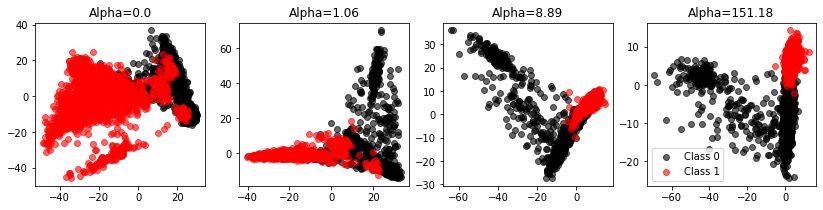

In [ ]:
from contrastive import CPCA

mdl = CPCA()
projected_data = mdl.fit_transform(target,backg,plot = True,active_labels = labels)

In [ ]:
mdl.

NoneType

## UC_data

In [ ]:
path2 = '/content/drive/MyDrive/ucdata.h5ad'
adata1 = sc.read(path2)

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [ ]:
adata1

AnnData object with n_obs × n_vars = 366650 × 21787
    obs: 'nGene', 'nUMI', 'orig.ident', 'sample', 'ab', 'subject', 'rep', 'health', 'hui', 'location', 'inflamed', 'num_pcs', 'doublet', 'cell_subset', 'sample_id', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'annot_level_1', 'annot_level_2', 'annot_level_3', 'annot_level_4'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'annot_level_1_colors', 'annot_level_2_colors', 'annot_level_3_colors', 'annot_level_4_colors', 'cell_subset_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [ ]:
adata1.obs

,nGene,nUMI,orig.ident,sample,ab,subject,rep,health,hui,location,...,cell_subset,sample_id,percent_mito,percent_ribo,n_counts,leiden,annot_level_1,annot_level_2,annot_level_3,annot_level_4
N7.EpiA.AAACCGTGCATCAG,257,663,N7,EpiA,A,N7,1,UC,Non-inflamed,Epi,...,TA 1,N7.EpiA,0.096531,0.203620,663.0,3,Epithelial,TA,TA,TA_1
N7.EpiA.AAACGCACAATCGC,300,639,N7,EpiA,A,N7,1,UC,Non-inflamed,Epi,...,TA 2,N7.EpiA,0.012520,0.198748,639.0,3,Epithelial,TA,TA,TA_2
N7.EpiA.AAAGATCTAACCGT,250,649,N7,EpiA,A,N7,1,UC,Non-inflamed,Epi,...,Enterocyte Progenitors,N7.EpiA,0.020031,0.123267,649.0,3,Epithelial,Enterocytes,Enterocyte_Progenitors,Enterocyte_Progenitors
N7.EpiA.AAAGATCTAGGCGA,284,769,N7,EpiA,A,N7,1,UC,Non-inflamed,Epi,...,Enterocyte Progenitors,N7.EpiA,0.019506,0.061118,769.0,3,Epithelial,Enterocytes,Enterocyte_Progenitors,Enterocyte_Progenitors
N7.EpiA.AAAGCCTGCTCGAA,339,951,N7,EpiA,A,N7,1,UC,Non-inflamed,Epi,...,Enterocyte Progenitors,N7.EpiA,0.003155,0.052576,951.0,3,Epithelial,Enterocytes,Enterocyte_Progenitors,Enterocyte_Progenitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1110.LPB.TTTGGTTAGGATGGTC,635,1366,U1110,LPB,B,U1110,1,UC,Inflamed,LP,...,Macrophages,U1110.LPB,0.062225,0.148609,1366.0,11,Immune,Macrophages,Macrophages,Macrophages
U1110.LPB.TTTGGTTCACCTCGTT,610,2730,U1110,LPB,B,U1110,1,UC,Inflamed,LP,...,Plasma,U1110.LPB,0.052015,0.171062,2730.0,2,Immune,B_Lymphocytes,Plasma,Plasma
U1110.LPB.TTTGGTTTCGGAAACG,859,1979,U1110,LPB,B,U1110,1,UC,Inflamed,LP,...,Macrophages,U1110.LPB,0.010106,0.206670,1979.0,22,Immune,Macrophages,Macrophages,Macrophages
U1110.LPB.TTTGTCAGTTGACGTT,965,2696,U1110,LPB,B,U1110,1,UC,Inflamed,LP,...,Macrophages,U1110.LPB,0.059718,0.202151,2696.0,11,Immune,Macrophages,Macrophages,Macrophages


In [ ]:
adata1.obs['health'].unique()

['UC', 'Healthy']
Categories (2, object): ['Healthy', 'UC']

In [ ]:
adata_h = adata1[adata1.obs.health == 'Healthy']
adata_d = adata1[adata1.obs.health == 'UC']